In [1]:
import pandas as pd

context=pd.read_csv("1001081_kmeans.csv",encoding='BIG5')
context.head()

,號碼,緯度,經度,上午投遞成功率,下午投遞成功率,重量,重量單位,郵局
0,0,25.051250,121.548230,NaN,NaN,NaN,NaN,1
1,1,25.051580,121.549143,0.612903,0.800000,4636.415737,1.0,0
2,2,25.067000,121.577467,0.725000,0.688889,2514.927244,1.0,0
3,3,25.041049,121.565944,0.527778,0.605263,2750.508338,1.0,0
4,4,25.052859,121.530559,0.611111,0.700000,5886.066072,2.0,0


In [2]:
x=pd.read_csv("100081_1_3.csv",encoding='BIG5')
xx=x[["Column1","Column2","Column9","Column10","Column12"]].copy()
xx.columns=['車牌', '狀態', '經度','緯度','時間']
xx.head()
#按照時間排序

,車牌,狀態,經度,緯度,時間
0,3507-QB,在外暫停,121.5484,25.0499,2018/1/3 10:40
1,3507-QB,在外暫停,121.5490,25.0513,2018/1/3 10:41
2,3507-QB,在外暫停,121.5490,25.0513,2018/1/3 10:41
3,3507-QB,在外暫停,121.5506,25.0610,2018/1/3 10:44
4,3507-QB,在外暫停,121.5506,25.0610,2018/1/3 10:44


In [3]:
def distance_compute (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [13]:
new=xx.copy()
for i in range(0,new.shape[0]):
    x1=new["緯度"].iloc[i]
    y1=new["經度"].iloc[i]
    
    distance_list=[]
    for j in range(0,context.shape[0]):
        x2=context["緯度"].iloc[j]
        y2=context["經度"].iloc[j]
        distance_list.append(distance_compute(x1,y1,x2,y2))
    index=distance_list.index(min(distance_list))
    new["緯度"].iloc[i]=context["緯度"].iloc[index]
    new["經度"].iloc[i]=context["經度"].iloc[index]
new.head()

D:\anaconda\envs\python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,車牌,狀態,經度,緯度,時間
0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40
1,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
2,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
3,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44
4,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44


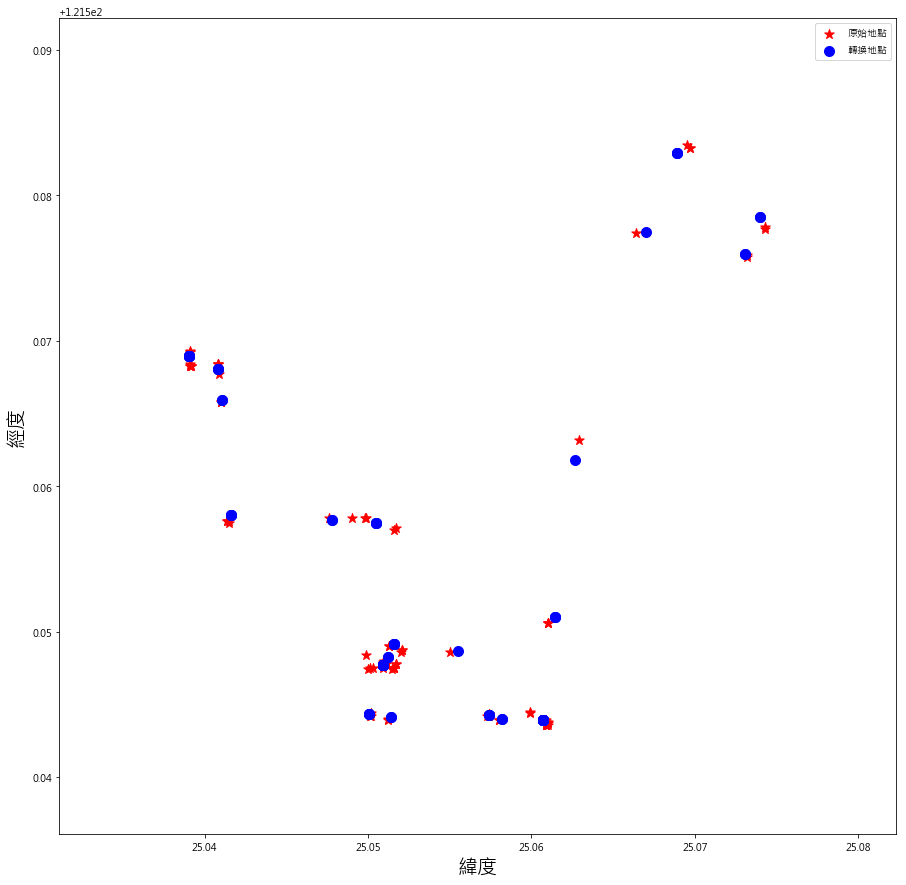

In [12]:
#藍色:路網的點 紅色:原始的點位置
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (15,15))
plt.scatter(xx["緯度"],xx["經度"], marker='*',c='r',s=100,label='原始地點')
plt.scatter(new["緯度"],new["經度"], marker='o',c='b',s=100,label='轉換地點')
plt.xlabel('緯度',fontsize='20')
plt.ylabel('經度',fontsize='20')
plt.legend(loc='upper right')
#plt.xticks(fontsize='30')
#plt.yticks(fontsize='30')
plt.savefig('1.png', dpi=300)
plt.show()

判斷是不是在同一個地點，如果兩個間距時間很短的資料其經緯度相同代表司機還沒移動到其他地方，表示還在同一個點

In [14]:
test1=list(new["緯度"])
test2=list(new["經度"])

hello=new.copy()
for i in range(1,new.shape[0]):
    if test1[i]==test1[i-1] and test2[i]==test2[i-1]:
        hello=hello.drop(index=i)
print (hello.shape[0])
hello.head()

28


,車牌,狀態,經度,緯度,時間
0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40
1,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
3,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44
6,3507-QB,在外暫停,121.577467,25.067000,2018/1/3 10:50
7,3507-QB,在外暫停,121.582956,25.068892,2018/1/3 10:52


No handles with labels found to put in legend.


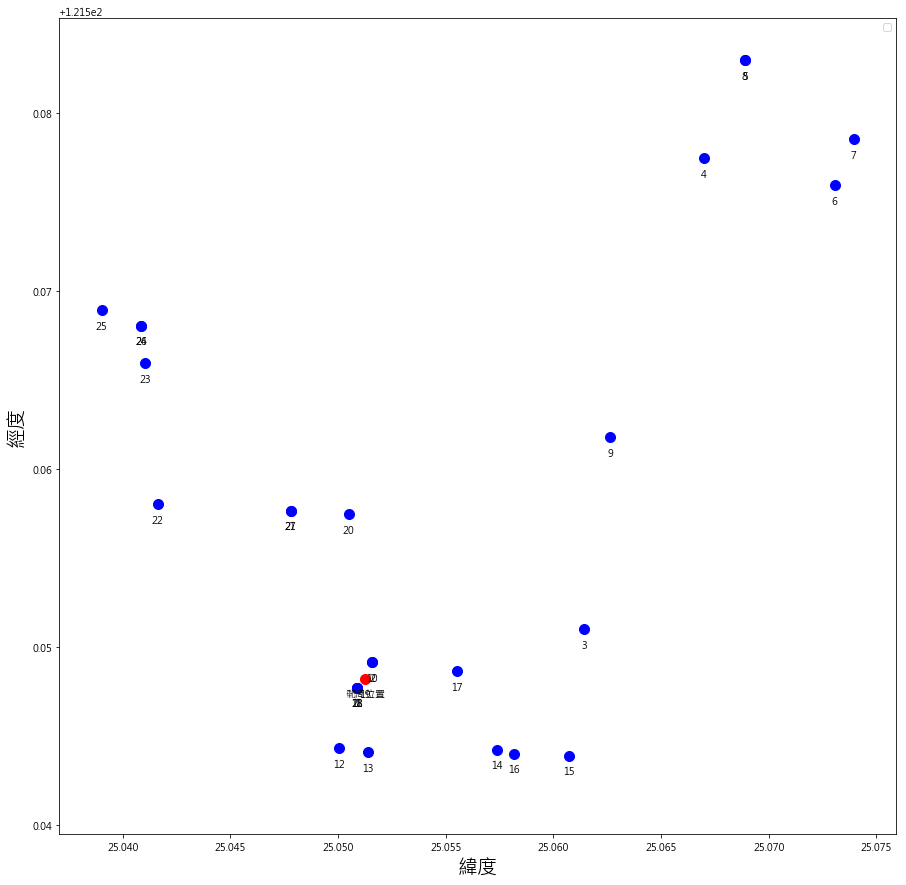

In [34]:
fig = plt.figure(figsize = (15,15))
for i in range(hello.shape[0]):
    if hello["緯度"].iloc[i]==context["緯度"].iloc[0]:
        plt.scatter(hello["緯度"].iloc[i],hello["經度"].iloc[i], marker='o',c='r',s=100)
    else:
        plt.scatter(hello["緯度"].iloc[i],hello["經度"].iloc[i], marker='o',c='b',s=100)

plt.xlabel('緯度',fontsize='20')
plt.ylabel('經度',fontsize='20')
plt.legend(loc='upper right')
for i in range(hello.shape[0]):
    plt.annotate(
        '%d' %(i+1),
        xy=(hello["緯度"].iloc[i], hello["經度"].iloc[i]),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')
    
plt.annotate(
        '%s' %("郵局位置"),
        xy=(context["緯度"].iloc[0], context["經度"].iloc[0]),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')

plt.savefig('2.png', dpi=300)
plt.show()

In [28]:
final =pd.merge(hello,context)
final.sort_values('時間', inplace=True)
final

,車牌,狀態,經度,緯度,時間,號碼,上午投遞成功率,下午投遞成功率,重量,重量單位,郵局
0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40,36,0.656250,0.595238,429.615603,1.0,0
4,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41,1,0.612903,0.800000,4636.415737,1.0,0
6,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44,12,0.731707,0.642857,3376.983448,1.0,0
7,3507-QB,在外暫停,121.577467,25.067000,2018/1/3 10:50,2,0.725000,0.688889,2514.927244,1.0,0
8,3507-QB,在外暫停,121.582956,25.068892,2018/1/3 10:52,14,0.527778,0.625000,5298.138248,2.0,0
10,3507-QB,在外暫停,121.575947,25.073071,2018/1/3 10:55,9,0.631579,0.675676,438.149725,1.0,0
11,3507-QB,在外暫停,121.578517,25.073961,2018/1/3 10:58,29,0.617647,0.621622,12948.506834,3.0,0
9,3507-QB,在外暫停,121.582956,25.068892,2018/1/3 11:01,14,0.527778,0.625000,5298.138248,2.0,0
12,3507-QB,在外暫停,121.561800,25.062650,2018/1/3 11:06,8,0.738095,0.571429,1414.967152,1.0,0
5,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 11:10,1,0.612903,0.800000,4636.415737,1.0,0


In [9]:
new

,車牌,狀態,經度,緯度,時間
0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40
1,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
2,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
3,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44
4,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44
5,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:45
6,3507-QB,在外暫停,121.577467,25.067000,2018/1/3 10:50
7,3507-QB,在外暫停,121.582956,25.068892,2018/1/3 10:52
8,3507-QB,在外暫停,121.575947,25.073071,2018/1/3 10:55
9,3507-QB,在外暫停,121.575947,25.073071,2018/1/3 10:56


In [10]:
new.head()

,車牌,狀態,經度,緯度,時間
0,3507-QB,在外暫停,121.547727,25.050895,2018/1/3 10:40
1,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
2,3507-QB,在外暫停,121.549143,25.051580,2018/1/3 10:41
3,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44
4,3507-QB,在外暫停,121.551000,25.061429,2018/1/3 10:44


In [18]:
context['經度'].iloc[0]

121.54823

In [31]:
b= new["緯度"] == context['緯度'].iloc[0]
dict1 = {}
for key in b:
    dict1[key] = dict1.get(key, 0) + 1
print (dict1)

{False: 92, True: 2}


In [32]:
new[b]

,車牌,狀態,經度,緯度,時間
62,3507-QB,在外暫停,121.54823,25.05125,2018/1/3 16:59
63,3507-QB,在外暫停,121.54823,25.05125,2018/1/3 16:59


In [35]:
import os
os.getcwd()
final.to_csv('Result.csv',encoding='BIG5')